# Trend of misinformation metrics in recommendations and home page results over the experiment

The charts below explore how the average misinformation score changed over the experiment as, first, 40 misinformation promoting videos were watched and then 40 misinformation debunking videos were watched.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
DATA_PATH = os.path.join('..', 'Data', 'predicted_data')

In [2]:
recommendations = pd.read_csv(os.path.join(DATA_PATH, 'recommendations_with_predicted_grouped.csv'), index_col=0)
home_page = pd.read_csv(os.path.join(DATA_PATH, 'home_page_with_predicted_grouped.csv'), index_col=0)

In [3]:
recommendations.head(2)

,topic,seed_sequence,score,annotated
0,911,1,0.10,96.0
1,911,2,0.08,98.0


In [4]:
home_page.head(2)

,topic,seed_sequence,score,annotated
0,911,0,-0.133333,23.333333
1,911,1,-0.120879,17.582418


## Top-10 recommendations

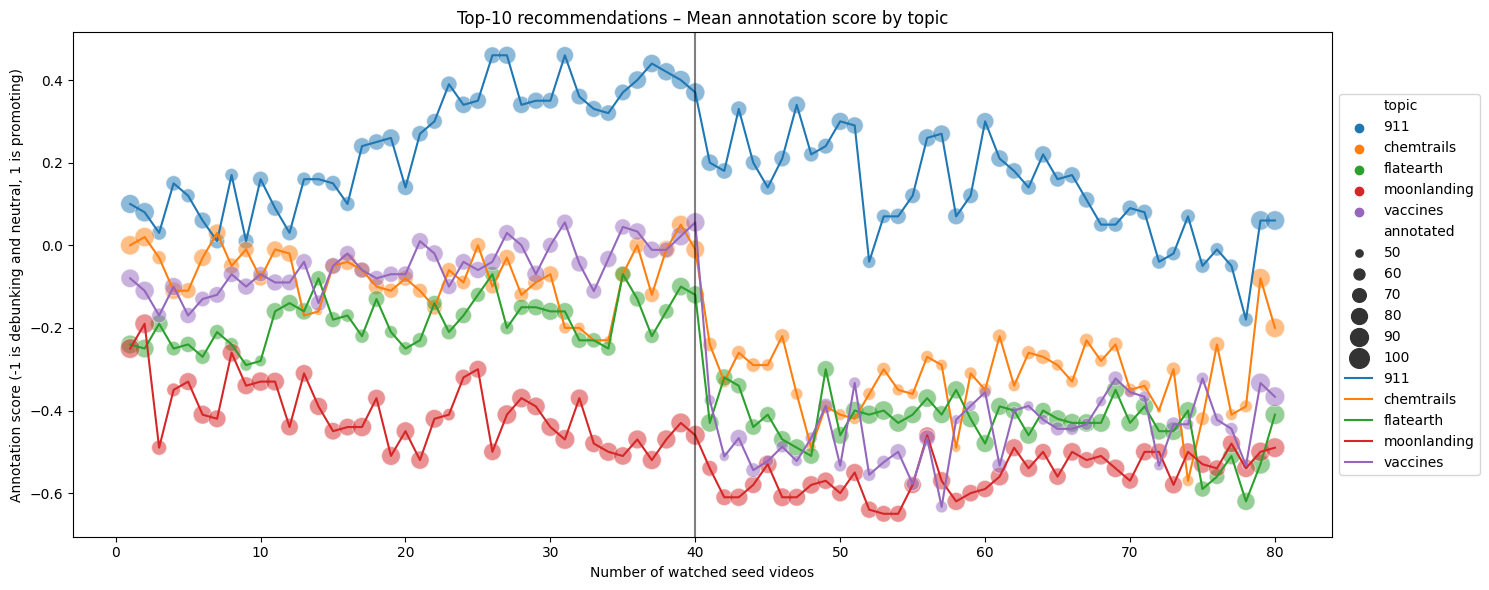

In [5]:
plt.rcParams["figure.figsize"] = (15, 6)

mean_label_value_by_topic = recommendations.set_index(['topic', 'seed_sequence'])['score'].unstack().T

ax = sns.scatterplot(
    x='seed_sequence',
    y='score',
    hue='topic',
    size='annotated',
    sizes=(0, 200),
    alpha=0.5,
    data=recommendations
)

mean_label_value_by_topic.plot(ax=ax, legend=False)

plt.axvline(x=40, color='black', alpha=0.5)
plt.title('Top-10 recommendations – Mean annotation score by topic')
plt.ylabel('Annotation score (-1 is debunking and neutral, 1 is promoting)')
plt.xlabel('Number of watched seed videos')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Home page results

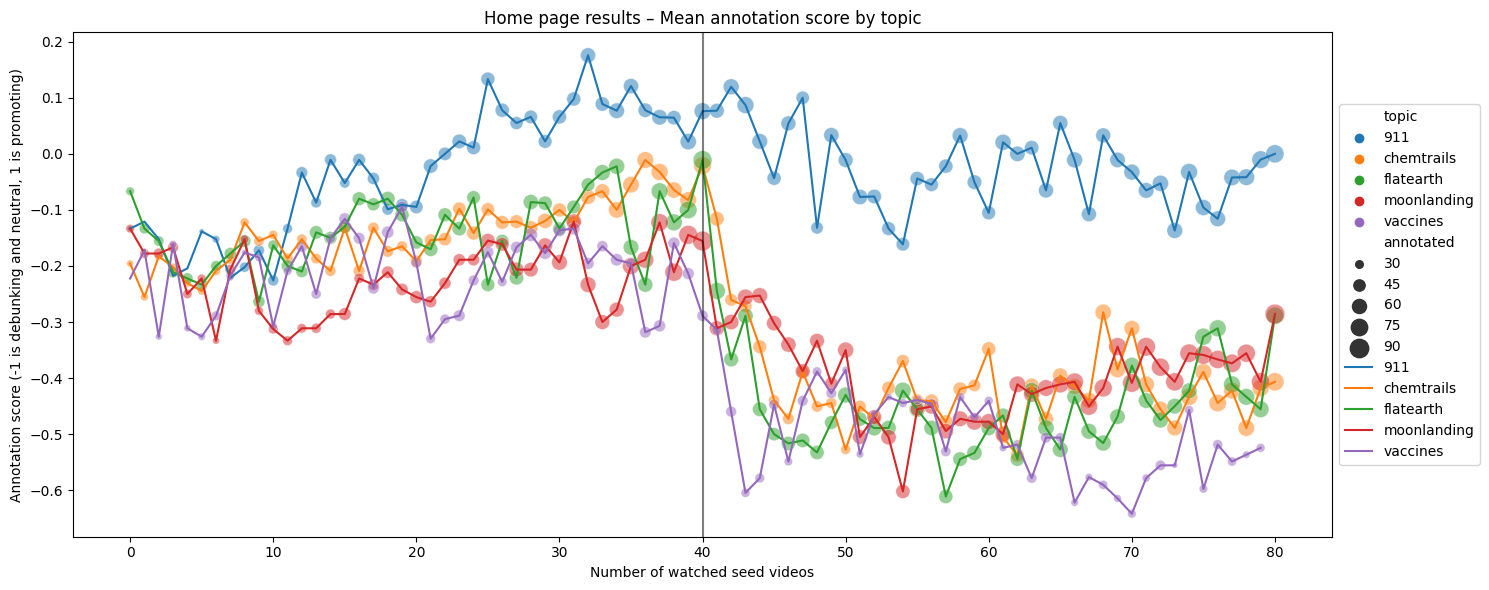

In [6]:
plt.rcParams["figure.figsize"] = (15, 6)

mean_label_value_by_topic = home_page.set_index(['topic', 'seed_sequence'])['score'].unstack().T

ax = sns.scatterplot(
    x='seed_sequence',
    y='score',
    hue='topic',
    size='annotated',
    sizes=(0, 200),
    alpha=0.5,
    data=home_page
)

mean_label_value_by_topic.plot(ax=ax, legend=False)

plt.axvline(x=40, color='black', alpha=0.5)
plt.title('Home page results – Mean annotation score by topic')
plt.ylabel('Annotation score (-1 is debunking and neutral, 1 is promoting)')
plt.xlabel('Number of watched seed videos')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Slope of change (`DIFF-TO-LINEAR`)

In [7]:
recommendations_mean_scores = recommendations[['topic', 'seed_sequence', 'score']].pivot(
    index='seed_sequence', columns='topic', values='score'
)
home_page_mean_scores = home_page[['topic', 'seed_sequence', 'score']].pivot(
    index='seed_sequence', columns='topic', values='score'
)

In [8]:
recommendations_mean_scores

topic,911,chemtrails,flatearth,moonlanding,vaccines
seed_sequence,,,,,
1,0.10,0.00,-0.24,-0.25,-0.080000
2,0.08,0.02,-0.25,-0.19,-0.110000
3,0.03,-0.03,-0.19,-0.49,-0.170000
4,0.15,-0.11,-0.25,-0.35,-0.100000
5,0.12,-0.11,-0.24,-0.33,-0.170000
...,...,...,...,...,...
76,-0.01,-0.24,-0.56,-0.54,-0.422222
77,-0.05,-0.41,-0.51,-0.48,-0.444444
78,-0.18,-0.39,-0.62,-0.54,-0.533333


In [9]:
home_page_mean_scores

topic,911,chemtrails,flatearth,moonlanding,vaccines
seed_sequence,,,,,
0,-0.133333,-0.195652,-0.066667,-0.133333,-0.222222
1,-0.120879,-0.255319,-0.133333,-0.177778,-0.172043
2,-0.152174,-0.182796,-0.155556,-0.177778,-0.326087
3,-0.217391,-0.202128,-0.211111,-0.166667,-0.161290
4,-0.204301,-0.230769,-0.222222,-0.250000,-0.311111
...,...,...,...,...,...
76,-0.115789,-0.444444,-0.311111,-0.366667,-0.518519
77,-0.042105,-0.422222,-0.411111,-0.373626,-0.548780
78,-0.041667,-0.489130,-0.433333,-0.355556,-0.536585


In [10]:
# Fill the missing value in home page mean scores by the previous one
home_page_mean_scores.iloc[80]['vaccines'] = home_page_mean_scores.iloc[79]['vaccines']
home_page_mean_scores

topic,911,chemtrails,flatearth,moonlanding,vaccines
seed_sequence,,,,,
0,-0.133333,-0.195652,-0.066667,-0.133333,-0.222222
1,-0.120879,-0.255319,-0.133333,-0.177778,-0.172043
2,-0.152174,-0.182796,-0.155556,-0.177778,-0.326087
3,-0.217391,-0.202128,-0.211111,-0.166667,-0.161290
4,-0.204301,-0.230769,-0.222222,-0.250000,-0.311111
...,...,...,...,...,...
76,-0.115789,-0.444444,-0.311111,-0.366667,-0.518519
77,-0.042105,-0.422222,-0.411111,-0.373626,-0.548780
78,-0.041667,-0.489130,-0.433333,-0.355556,-0.536585


In [11]:
def linear_value(x_start, x_end, x_desired, df):
    slope = (df.loc[x_end] - df.loc[x_start]) / (x_end - x_start)
    return slope * (x_desired - x_start) + df.loc[x_start]

In [12]:
recommendations_linear = pd.concat([
    pd.DataFrame({
        i: linear_value(x_start=1, x_end=40, x_desired=i, df=recommendations_mean_scores)
        for i in range(1, 41)
    }).T,
    pd.DataFrame({
        i: linear_value(x_start=40, x_end=80, x_desired=i, df=recommendations_mean_scores)
        for i in range(41, 81)
    }).T,
])

In [13]:
home_page_linear = pd.concat([
    pd.DataFrame({
        i: linear_value(x_start=1, x_end=40, x_desired=i, df=home_page_mean_scores)
        for i in range(1, 41)
    }).T,
    pd.DataFrame({
        i: linear_value(x_start=40, x_end=80, x_desired=i, df=home_page_mean_scores)
        for i in range(41, 81)
    }).T,
])

In [14]:
recommendations_diff_to_linear = (recommendations_mean_scores - recommendations_linear)

recommendations_diff_to_linear_p1 = recommendations_diff_to_linear.loc[1:40].sum()
recommendations_diff_to_linear_p2 = recommendations_diff_to_linear.loc[40:].sum()

In [15]:
home_page_diff_to_linear = (home_page_mean_scores - home_page_linear)

home_page_diff_to_linear_p1 = home_page_diff_to_linear.loc[1:40].sum()
home_page_diff_to_linear_p2 = home_page_diff_to_linear.loc[40:].sum()

### Phase 1: Promoting phase

In [16]:
(recommendations_diff_to_linear_p1 * 1000).round() / 1000

topic
911            0.550
chemtrails    -2.810
flatearth     -0.230
moonlanding   -2.060
vaccines      -1.631
dtype: float64

In [17]:
(home_page_diff_to_linear_p1 * 1000).round() / 1000

topic
911           -0.268
chemtrails    -0.016
flatearth     -2.686
moonlanding   -2.216
vaccines       0.708
dtype: float64

### Phase 2: Debunking phase

In [18]:
(recommendations_diff_to_linear_p2 * 1000).round() / 1000

topic
911            -3.255
chemtrails     -8.645
flatearth      -6.555
moonlanding    -3.185
vaccines      -11.454
dtype: float64

In [19]:
(home_page_diff_to_linear_p2 * 1000).round() / 1000

topic
911            -2.569
chemtrails     -7.735
flatearth     -11.935
moonlanding    -7.092
vaccines       -3.923
dtype: float64